# 1.Імпорт і формування вибірки

In [0]:
import os
import PIL.Image
import cv2

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [0]:
def getImgs(path):
  imgs=[] 
  for img in os.listdir(path):
    imgs.append(np.array(PIL.Image.open(path+img)))
    
  return np.asarray(imgs)

imgs= getImgs('/content/drive/My Drive/mirflickr/')
print('Sampled {} RGB-images'.format(len(imgs)))

Sampled 250 RGB-images


In [0]:
green_img_list=[]
for img in imgs:
  green_img_list.append(np.array(cv2.split(img)[1]))

green_img_list = np.array(green_img_list)

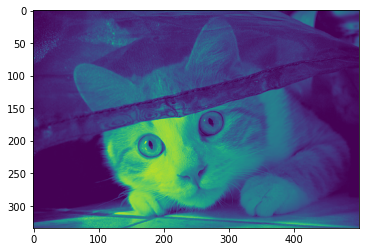

In [0]:
plt.imshow(green_img_list[8])

In [0]:
green_img_list[8].shape

(334, 500)

# 2.Декомпозиція

Для реалізації методу головних компонент застосувала бібліотеку sklearn. у функції нижче створюєтьс об'єкт PCA(), в якому важливим аргументом є n_components, що позначає відсоток або кількість головних компонент, які хочемо отримати (якщо None, тоді з документації n_components == min(n_samples, n_features) - 1, тобто в нашому випадку, декомпозуючи картинку, за кількість компонент вибирається або її ширина, або висота - залежно від того, що менше). Саму ж сингулярну декомпозицію забезпечує метод fit_transform(), який знаходить сингулярні вектори (вони ж - головні компоненти), відповідні їм сингулярні числа, дисперсія значень яскравості пікселів зеленого каналу і т.п. Для реконструкції зображення застосовуєтьс метод inverse_transform.

In [0]:
def decompose_reconstruct(img, reconstruct=False, alpha=None):
  pca = PCA(n_components=alpha, svd_solver='full')
  decomposed_img=pca.fit_transform(img)
  if reconstruct:
    return pca.inverse_transform(decomposed_img)
  return pca

Як приклад, реконструюємо одне із тестових зображень та побудуємо scree plot із першими 10-ма головними компонентами та відсотком дисперсії, яку кожна з них поснює.

In [0]:
pca=decompose_reconstruct(green_img_list[8])
reconstructed_img=decompose_reconstruct(green_img_list[8], reconstruct=True)

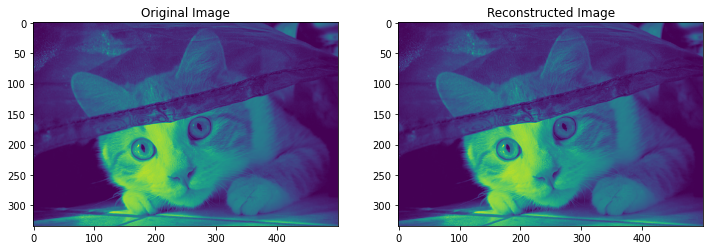

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(12, 12))
axs[0].imshow(green_img_list[8])
axs[1].imshow(reconstructed_img)
axs[0].title.set_text('Original Image')
axs[1].title.set_text('Reconstructed Image')

Кількість компонент рівна висоті зображення.

In [0]:
len(pca.components_)==green_img_list[8].shape[0]

True

Scree plot

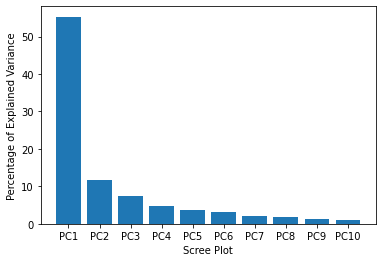

In [0]:
percentage_var=[]
for i in range(10):
  percentage_var.append(np.round(pca.explained_variance_ratio_[i]*100, decimals=1))
plot_labels = ['PC' + str(x) for x in range(1, 11)]
plt.bar(x=range(1, 11), height=percentage_var, tick_label = plot_labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Scree Plot')
plt.show()

a) За замовченням сингулярні числа вже відсортовані в порядку зменшення.

In [0]:
pca.singular_values_

array([1.32332115e+04, 6.09640528e+03, 4.83361279e+03, 3.89224375e+03,
       3.46375793e+03, 3.16874268e+03, 2.57378219e+03, 2.29363119e+03,
       2.01415216e+03, 1.66291265e+03, 1.53745826e+03, 1.45208564e+03,
       1.20783598e+03, 1.12320940e+03, 1.11792646e+03, 1.02242309e+03,
       9.73764463e+02, 9.46481741e+02, 8.92550359e+02, 8.49090562e+02,
       8.16026321e+02, 7.76080210e+02, 7.47266116e+02, 6.86093939e+02,
       6.40069550e+02, 6.31807824e+02, 5.88220281e+02, 5.71598766e+02,
       5.65358892e+02, 5.34144630e+02, 4.95912689e+02, 4.86615564e+02,
       4.75083071e+02, 4.68535141e+02, 4.54171247e+02, 4.30638118e+02,
       4.28778536e+02, 4.15230457e+02, 4.00283595e+02, 3.95959517e+02,
       3.84800378e+02, 3.82667238e+02, 3.69723955e+02, 3.56667271e+02,
       3.50669885e+02, 3.45014737e+02, 3.43138650e+02, 3.32706957e+02,
       3.30120518e+02, 3.22074427e+02, 3.19300926e+02, 3.11322994e+02,
       3.07262432e+02, 3.02966392e+02, 3.01814141e+02, 2.85878513e+02,
      

## Порівняння

In [0]:
mse_8 = mean_squared_error(green_img_list[8], reconstructed_img)
print('MSE={}'.format(mse_8))

MSE=2.1690441900678613e-26


Показник середньоквадратичного відхилення, обрахований вище, зовсім незначний, оскільки для реконструкції було використано всі головні компоненти. Виберемо лише alpha% компонент (10<alpha<100, step=10) і знову порівняємо вихідне та реконструйоване зображення за показником MSE. 

###b) Реконструкція зображенні при використанні alpha% компонентів

In [0]:
def reconstructed_list(img):
  reconstructed_list = [decompose_reconstruct(img, reconstruct=True, alpha=0.1*step) for step in range(1,10)]
  reconstructed_list.append(decompose_reconstruct(img, reconstruct=True))
  return np.array(reconstructed_list)

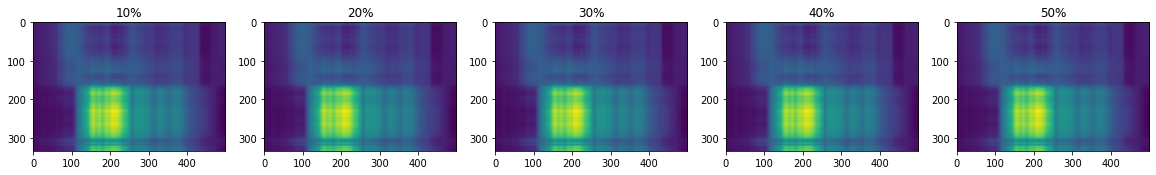

In [0]:
reconstructed_list_8 = reconstructed_list(green_img_list[8])
fig, axs = plt.subplots(1, 5, figsize=(20,20))
axs[0].imshow(reconstructed_list_8[0])
axs[0].title.set_text('10%')
axs[1].imshow(reconstructed_list_8[1])
axs[1].title.set_text('20%')
axs[2].imshow(reconstructed_list_8[2])
axs[2].title.set_text('30%')
axs[3].imshow(reconstructed_list_8[3])
axs[3].title.set_text('40%')
axs[4].imshow(reconstructed_list_8[4])
axs[4].title.set_text('50%')

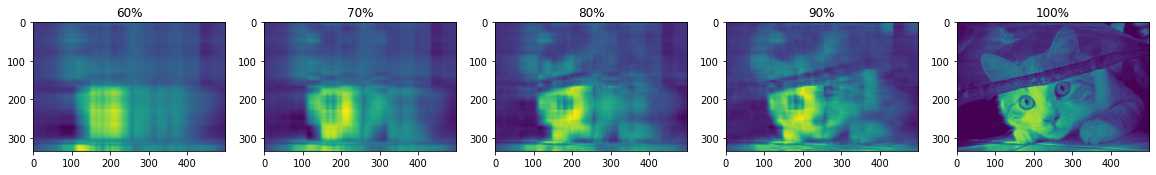

In [0]:
fig, axs = plt.subplots(1, 5, figsize=(20,20))
axs[0].imshow(reconstructed_list_8[5])
axs[0].title.set_text('60%')
axs[1].imshow(reconstructed_list_8[6])
axs[1].title.set_text('70%')
axs[2].imshow(reconstructed_list_8[7])
axs[2].title.set_text('80%')
axs[3].imshow(reconstructed_list_8[8])
axs[3].title.set_text('90%')
axs[4].imshow(reconstructed_list_8[9])
axs[4].title.set_text('100%')

###c) Порівняння вихідного та реконструйованих зображень (MSE)

Функція нижче повертає масив із середньоквадратичних відхилень реконструйованого зображення від вихідного для кожного alpha (10-100%).

In [0]:
def compareImgs(original, images):
  mse_list = np.array([mean_squared_error(original, recon_img) for recon_img in images])
  return mse_list

In [0]:
alphas = [10*step for step in range(1, 11)]

In [0]:
mse_list = compareImgs(green_img_list[8], reconstructed_list_8)

In [0]:
df = pd.DataFrame(data=mse_list, columns=['MSE'], index=["{}{}".format(a, '%') for a in alphas])
df.T

,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
MSE,848.031981,848.031981,848.031981,848.031981,848.031981,625.480141,485.577072,323.019105,167.433249,2.169044e-26


Графік залежності значення середньоквадратичного відхилення від частки головних компонент, що була використана для реконструкції зображення.

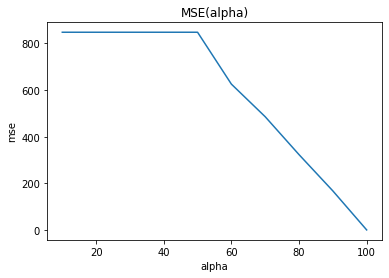

In [0]:
plt.plot(alphas, mse_list)
plt.xlabel('alpha')
plt.ylabel('mse')
plt.title('MSE(alpha)')
plt.show()

###d) Усереднині MSE(alpha) по тестовому пакету

In [0]:
def mean_mse(original_imgs, rcnstrctd_imgs):
  mean_mse = [np.mean([mean_squared_error(original_imgs[idx], rcnstrctd_imgs[alpha][idx]) for idx in range(len(original_imgs))]) for alpha in range(10)]
  return mean_mse

In [0]:
rcnstrctd_list_alphas = [[decompose_reconstruct(img, reconstruct=True, alpha=0.1*step) for img in green_img_list] for step in range(1,10)]
rcnstrctd_list_alphas.append([decompose_reconstruct(img, reconstruct=True) for img in green_img_list])
rcnstrctd_list_alphas = np.array(rcnstrctd_list_alphas)

In [0]:
mean_mse = mean_mse(green_img_list, rcnstrctd_list_alphas)

In [0]:
df = pd.DataFrame(data=mean_mse, columns=['Mean MSE'], index=["{}{}".format(a, '%') for a in alphas])
df.T

,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
Mean MSE,1697.948712,1682.171739,1597.620534,1444.325154,1267.735455,1081.515872,852.842967,591.520586,307.047362,4.798322e-26


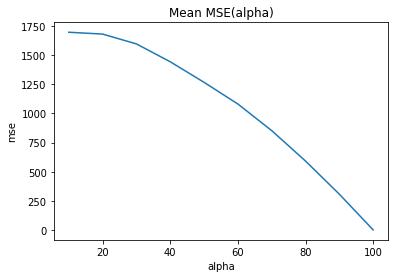

In [0]:
plt.plot(alphas, mean_mse)
plt.xlabel('alpha')
plt.ylabel('mse')
plt.title('Mean MSE(alpha)')
plt.show()

# Моделювання марківськими ланцюгами

##a) Формування стохастичної матриці

Всього станів у марківському ланцюзі 256 (кожний відповідає за значення яскравості пікселя), тому утворена матриця має розмір (256, 256) і містить імовірності переходу від одного стану до іншого. До нормалізації матриця формувалася обробкою значень яскравості пікселів методом 2 (по горизонталі, справа наліво). 

In [0]:
def right_to_left_iteration(img, matrix):
  for row in range(img.shape[0]):
    for col in range(img.shape[1]-1, 0, -1):
      from_idx, to_idx = img[row][col], img[row][col-1]
      matrix[from_idx][to_idx]+=1

#https://stackoverflow.com/questions/8904694/how-to-normalize-a-2-dimensional-numpy-array-in-python-less-verbose
def normalize(matrix):
  row_sums = matrix.sum(axis=1) #сумуємо вздовж рядка по значеннях у стовпцях; на виході - масив із сумами кожного рядка
  return matrix/row_sums[:, np.newaxis] #row_sums.shape=(256,) -> row_sums.shape = (256, 1): для коректного ділення матриці на масив

def stochastic_matrix(images):
  st_mtrx = np.zeros((256, 256))
  for img in images:
    right_to_left_iteration(img, st_mtrx)
  st_mtrx = normalize(st_mtrx)
  return st_mtrx

In [0]:
Q = stochastic_matrix(green_img_list)
Q.shape

(256, 256)

In [0]:
print(Q[2:20, 2:20])

[[0.29956948 0.13338687 0.06017552 0.03279377 0.02011309 0.01374612
  0.01022031 0.00763169 0.00624268 0.00526208 0.00442354 0.00388293
  0.00337783 0.00285498 0.00267149 0.00246826 0.00228872 0.00210917]
 [0.17766523 0.2315302  0.1238976  0.06113976 0.03569249 0.0229478
  0.0161808  0.01192381 0.0097269  0.00743791 0.00629604 0.00522258
  0.00480688 0.0039176  0.0036887  0.00322564 0.00289676 0.00249684]
 [0.09870597 0.1522945  0.204046   0.1162648  0.06134233 0.03859049
  0.02616948 0.01904858 0.01433917 0.01141811 0.00936363 0.00758503
  0.00625108 0.00537151 0.00458282 0.00380387 0.00361887 0.00320019]
 [0.06183761 0.08671979 0.13274977 0.18602445 0.11742014 0.06556079
  0.04240763 0.02969953 0.02181625 0.01675243 0.01310394 0.01038531
  0.00835008 0.00718495 0.00616173 0.00513477 0.00455968 0.00416383]
 [0.04081105 0.05338758 0.07578967 0.12506071 0.18493363 0.11873462
  0.06884649 0.0449037  0.03278897 0.02415778 0.01848859 0.0145512
  0.01124683 0.00925226 0.00789467 0.00645349 